<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/YB_1121_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# 데이터 로드
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1)

In [24]:
# train, test split
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]
X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

* 랜덤포레스트에 적용

In [3]:
# 랜덤포레스트에 적용 (n_estimators=10, random_state=42)
from sklearn.ensemble import RandomForestClassifier
r_clf=RandomForestClassifier(n_estimators=10, random_state=42)
r_clf.fit(X_train, y_train)
y_pred=r_clf.predict(X_test)


In [4]:
# 정확도 결과
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9492

# 1. PCA

* PCA로 변환한 데이터 세트에 랜덤 포레스트 적용

In [5]:
# PCA 라이브러리 불러오기
from sklearn.decomposition import PCA

In [6]:
# PCA 적용 95% : n_components=0.95
pca=PCA(n_components=0.95)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [7]:
# PCA 이후 랜덤포레스트 훈련
r_clf=RandomForestClassifier(n_estimators=10, random_state=42)
r_clf.fit(X_train_pca, y_train)
y_pred=r_clf.predict(X_test_pca)

In [8]:
# 정확도 결과 (X_test도 PCA 적용해야합니다.)
accuracy_score(y_test,y_pred)

0.8925

**관련 문제**

* PCA모델을 와인 데이터셋에 적용하여 차원을 축소하고 그 결과를 그래프로 나타내보세요.

(1) 필요한 모듈 불러오기

In [9]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(2)  load_wine을 사용해 데이터셋을 생성한다.

In [12]:
wine=load_wine()
X_train=wine.data
y_train=wine.target

(3) X에 표준 스케일링(Standard scaling)을 적용하여 X_scaled을 생성한다.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_train)

(4) PCA 모델을 X에 적용하여 2개의 차원으로 추출한다. 단, random_state=1234로 설정한다.

In [14]:
#PCA 모델을 X_scaled에 적용하여 2개의 차원으로 추출한다.
pca=PCA(n_components=2, random_state=1234)
X_pca=pca.fit_transform(X_scaled)




(5) 추출한 피처를 그래프로 나타내라.

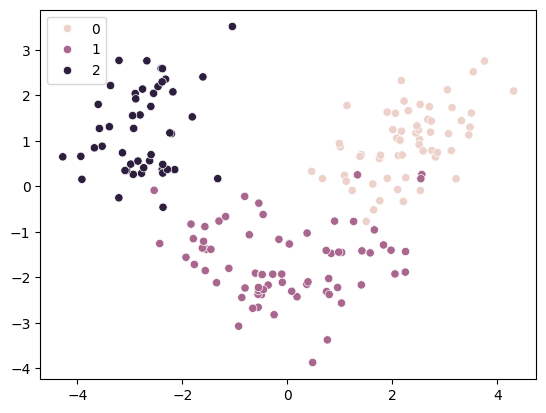

In [15]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train)
plt.show()

# 2. LDA

- LDA로 변환한 데이터 세트에 랜덤 포레스트 적용

In [16]:
# LDA 라이브러리 불러오기
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [25]:
# LDA 적용 : n_components=5
lda=LinearDiscriminantAnalysis(n_components=5)
X_lda=lda.fit_transform(X_train,y_train)
X_test_lda=lda.transform(X_test)

In [30]:
# LDA 이후 랜덤포레스트 훈련
r_clf=RandomForestClassifier(n_estimators=10, random_state=42)
r_clf.fit(X_lda, y_train)
y_pred=r_clf.predict(X_test_lda)

In [31]:
# 정확도 결과 (X_test도 LDA 적용해야합니다.)
accuracy_score(y_test,y_pred)

0.8301